# Analysis Of Runs Output

## Parsing Runs Data from log file

In [7]:
# Importing libs
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt

In [10]:
logs_file = Path('../.log')
regex_pattern = r'\[(.+?) Solution\].*?(\d+).*?(\d+)(?:.*?(\d+)\sthreads)?.*seconds:\s(.+)'

In [11]:
file_content = logs_file.read_text()
df = pd.DataFrame(
    data=re.findall(regex_pattern, file_content),
    columns=['Solution', 'Rows', 'Cols', 'Threads', 'Time (s)'],
)

numeric_columns = ['Rows', 'Cols', 'Threads', 'Time (s)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df = df[df["Rows"] <= 120]
# Removing duplicates
df = df.drop_duplicates(subset=["Solution", "Rows", "Cols", "Threads"], keep="last")

# Adding Speed UP and Efficiency information
seq_times = df[df["Solution"].str.contains("Sequential", case=False)].set_index("Rows")["Time (s)"]

df["Speedup"] = df.apply(
    lambda row: seq_times.get(row["Rows"], None) / row["Time (s)"]
    if row["Solution"].lower().startswith(("parallel", "thread pool"))
    else 1,
    axis=1
)

df["Efficiency"] = df.apply(
    lambda row: (row["Speedup"] / row["Threads"])
    if row["Threads"] and row["Threads"] > 0
    else 1,
    axis=1
)

# Display content
df

,Solution,Rows,Cols,Threads,Time (s),Speedup,Efficiency
0,Sequential,1,100000,NaN,10.785529,1.000000,1.000000
1,Parallel,1,100000,2.0,10.808176,0.997905,0.498952
2,Thread Pool API,1,100000,2.0,10.777149,1.000778,0.500389
3,Parallel,1,100000,4.0,10.787577,0.999810,0.249953
4,Thread Pool API,1,100000,4.0,10.877229,0.991570,0.247892
...,...,...,...,...,...,...,...
328,Thread Pool API,120,100000,32.0,207.811793,6.229327,0.194666
329,Parallel,120,100000,48.0,207.904952,6.226535,0.129719
330,Thread Pool API,120,100000,48.0,207.856593,6.227984,0.129750
331,Parallel,120,100000,64.0,208.024915,6.222945,0.097234


### Saving CSV file with parsed information

In [12]:
df.to_csv('data.csv')

## Generate Graphs

[np.int64(1), np.int64(10), np.int64(20), np.int64(30), np.int64(40), np.int64(50), np.int64(60), np.int64(70), np.int64(80), np.int64(90), np.int64(100)]


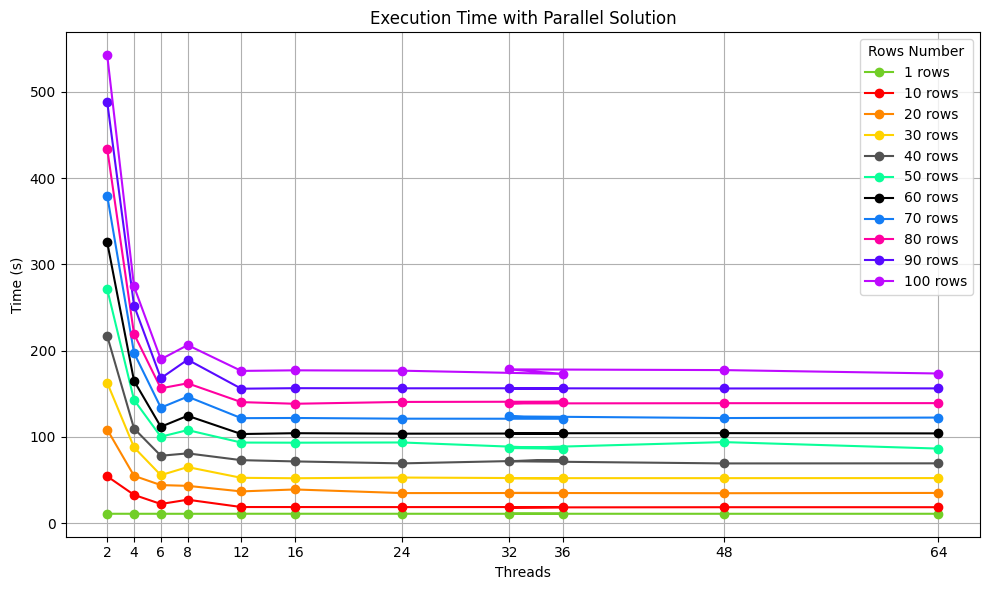

[np.int64(1), np.int64(10), np.int64(20), np.int64(30), np.int64(40), np.int64(50), np.int64(60), np.int64(70), np.int64(80), np.int64(90), np.int64(100)]


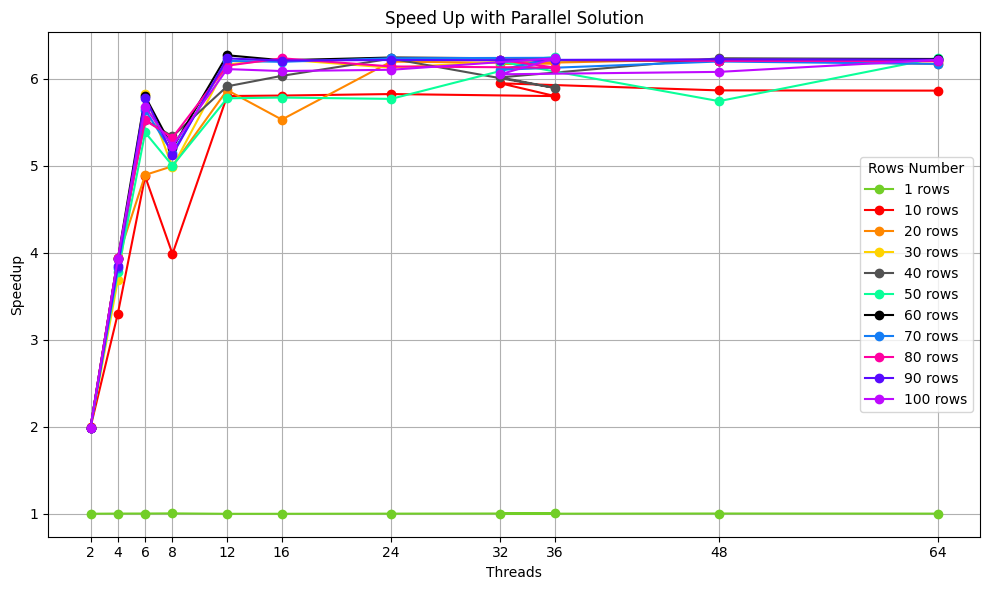

[np.int64(1), np.int64(10), np.int64(20), np.int64(30), np.int64(40), np.int64(50), np.int64(60), np.int64(70), np.int64(80), np.int64(90), np.int64(100)]


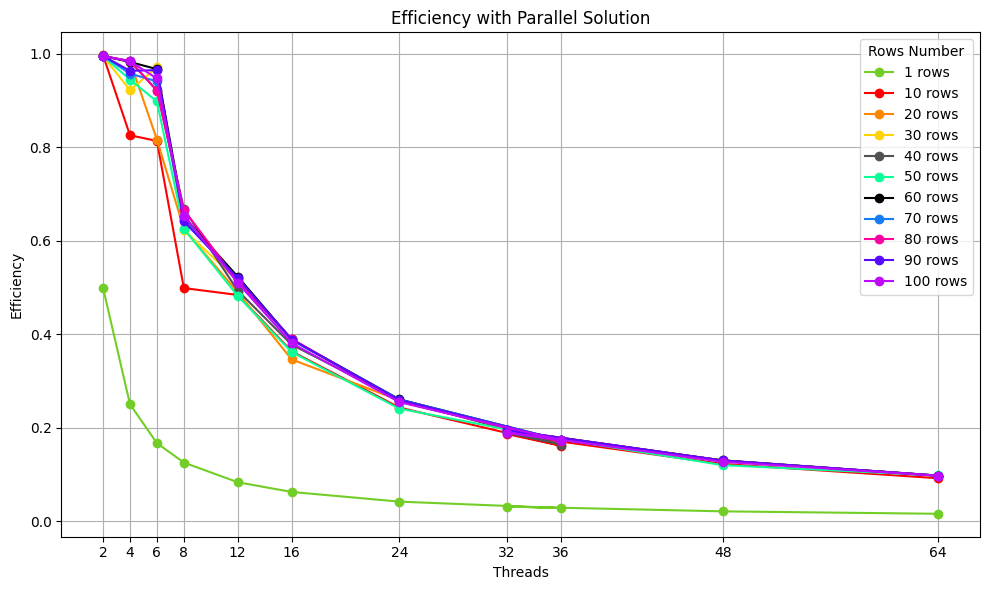

[np.int64(1), np.int64(10), np.int64(20), np.int64(30), np.int64(40), np.int64(50), np.int64(60), np.int64(70), np.int64(80), np.int64(90), np.int64(100)]


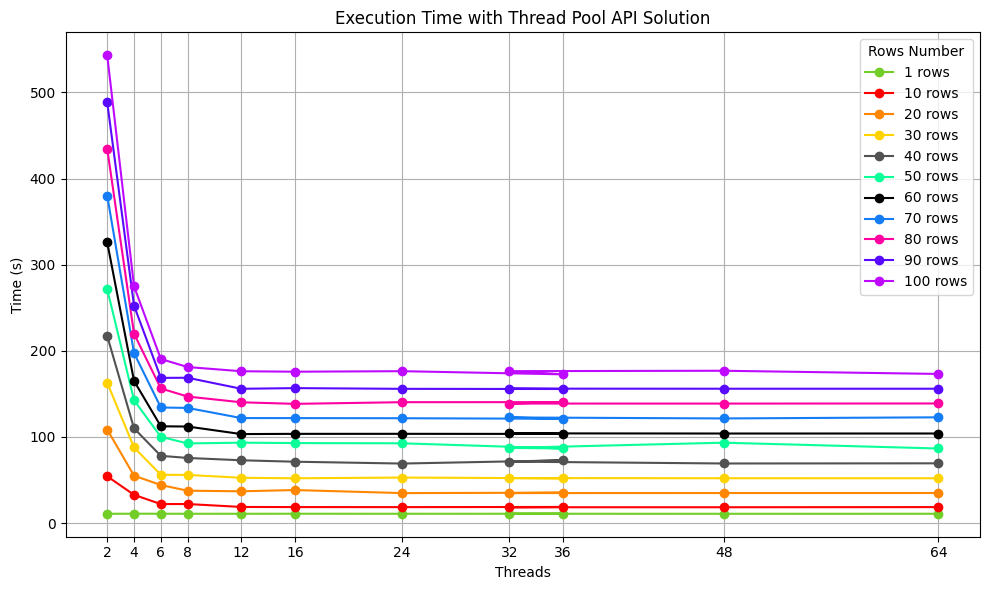

[np.int64(1), np.int64(10), np.int64(20), np.int64(30), np.int64(40), np.int64(50), np.int64(60), np.int64(70), np.int64(80), np.int64(90), np.int64(100)]


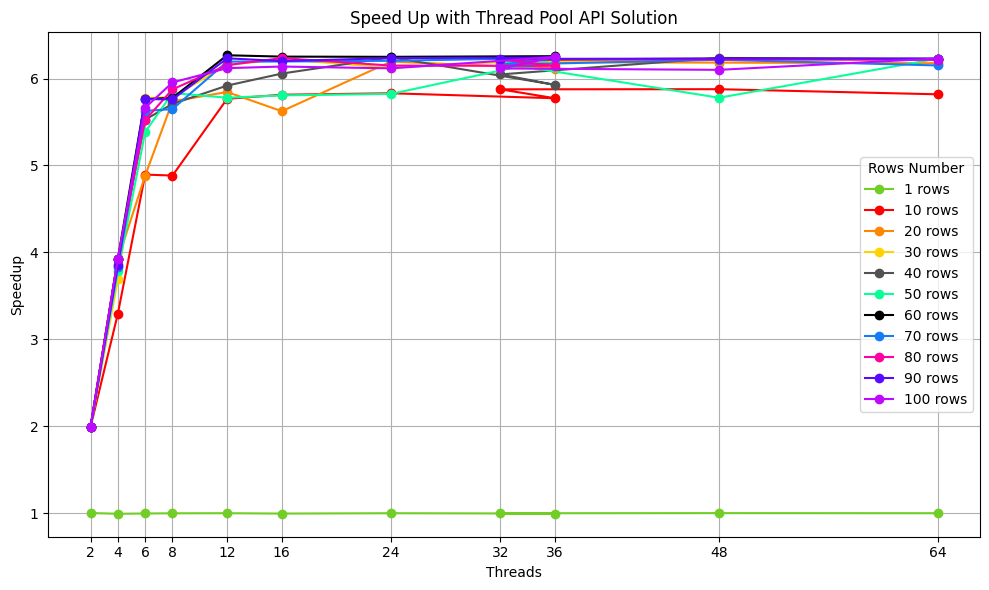

[np.int64(1), np.int64(10), np.int64(20), np.int64(30), np.int64(40), np.int64(50), np.int64(60), np.int64(70), np.int64(80), np.int64(90), np.int64(100)]


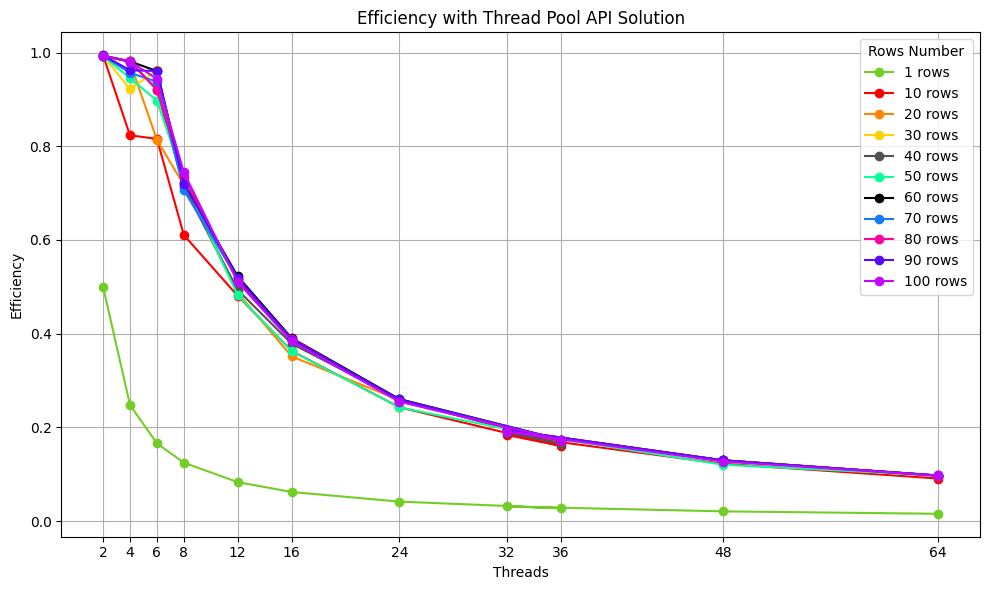

In [15]:
def generate_graphic(dataframe: pd.DataFrame, name: str, y_axis: str):
    rows_unique = sorted(dataframe["Rows"].unique())
    print(rows_unique)
    plt.figure(figsize=(10, 6))
    palette = [
        "#72ce27",
        "#FF0000",
        "#FF8700",
        "#FFD300",
        "#525252",
        "#0AFF99",
        "#000000",
        "#147DF5",
        "#ff00a1",
        "#580AFF",
        "#BE0AFF",
    ]

    for i, rows in enumerate(rows_unique):
        group = dataframe[dataframe["Rows"] == rows]
        x = group["Threads"]
        y = group[y_axis]
        plt.plot(x, y, marker="o", color=palette[i], label=f"{rows} rows")


    threads_ticks = sorted(dataframe["Threads"].unique())
    plt.xticks(threads_ticks)

    plt.title(name)
    plt.xlabel("Threads")
    plt.ylabel(y_axis.capitalize())
    plt.legend(title="Rows Number")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


parallel_solutions = ["Parallel", "Thread Pool API"]
for solution in parallel_solutions:
    solution_df = df[df["Solution"].str.contains(solution, case=False) & (df["Rows"] <= 100)]
    generate_graphic(solution_df, name=f"Execution Time with {solution} Solution", y_axis="Time (s)")
    generate_graphic(solution_df, name=f"Speed Up with {solution} Solution", y_axis="Speedup")
    generate_graphic(solution_df, name=f"Efficiency with {solution} Solution", y_axis="Efficiency")

